In [1]:
import astroML.stats
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

In [2]:
N = 10**4
# 1) Start off on a cloudy day
weather = [0]
# 0 = cloud      1 = sun
# 2) Implement the weather forecast for N days
for i in range(N):
    
    if (weather[i]==1):
        num = np.random.uniform()
        if (num>=0.9):
            weather.append(0)
        else:
            weather.append(1)
            
    if (weather[i]==0):
        num = np.random.uniform()
        if (num<=0.5):
            weather.append(0)
        else:
            weather.append(1)
            
cumulative_s = [0]
cumulative_c = [1]
sunny  = 0
cloudy = 0
for i in range(1,N):
    if (weather[i]==1):
        sunny += 1
        cumulative_s.append(cumulative_s[i-1]+1)
        cumulative_c.append(cumulative_s[i-1])
    else:
        cloudy +=1
        cumulative_s.append(cumulative_s[i-1])
        cumulative_c.append(cumulative_s[i-1]+1)

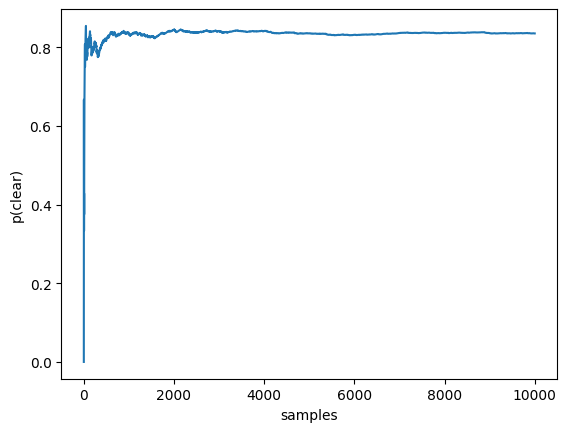

In [3]:
# 3) Plot the number of days vs cumulative number of sunny days over number of days (it's a TRACE PLOT)
xaxis  = np.linspace(1,N,num=N-1)
prob_s = np.asarray([cumulative_s[i]/i for i in range(1,N)])
plt.plot(xaxis, prob_s)
plt.xlabel('samples')
plt.ylabel('p(clear)')
plt.show()

In [4]:
print('sunny days: ', sunny/N)
print('cloudy days: ', cloudy/N)

sunny days:  0.835
cloudy days:  0.1649


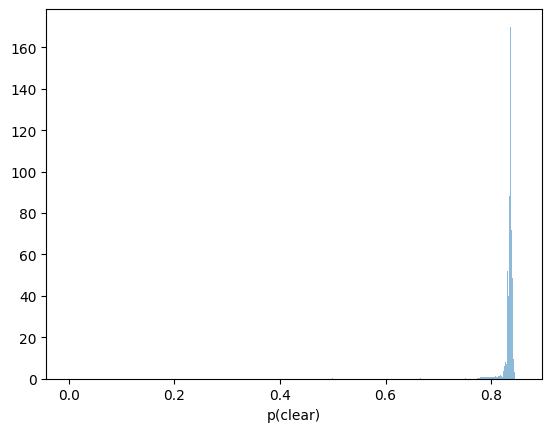

In [5]:
# 4) Histogram of the plot. This reveals the distribution of p(clear)
plt.hist(prob_s, bins=500, density=True, alpha=0.5)
plt.xlabel('p(clear)')
plt.show()

In [6]:
# 5) Use a summary statistics to determine the most likely value and an error on our estimate.
mean    = np.mean(prob_s)
median  = np.median(prob_s)
sigma_G = astroML.stats.sigmaG(prob_s)
print('The mean is %.3f' % mean + 
      '\nThe median is %.3f' % median + 
      '\nThe error sigma_G is %.3f' % sigma_G)

The mean is 0.834
The median is 0.836
The error sigma_G is 0.003


**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***

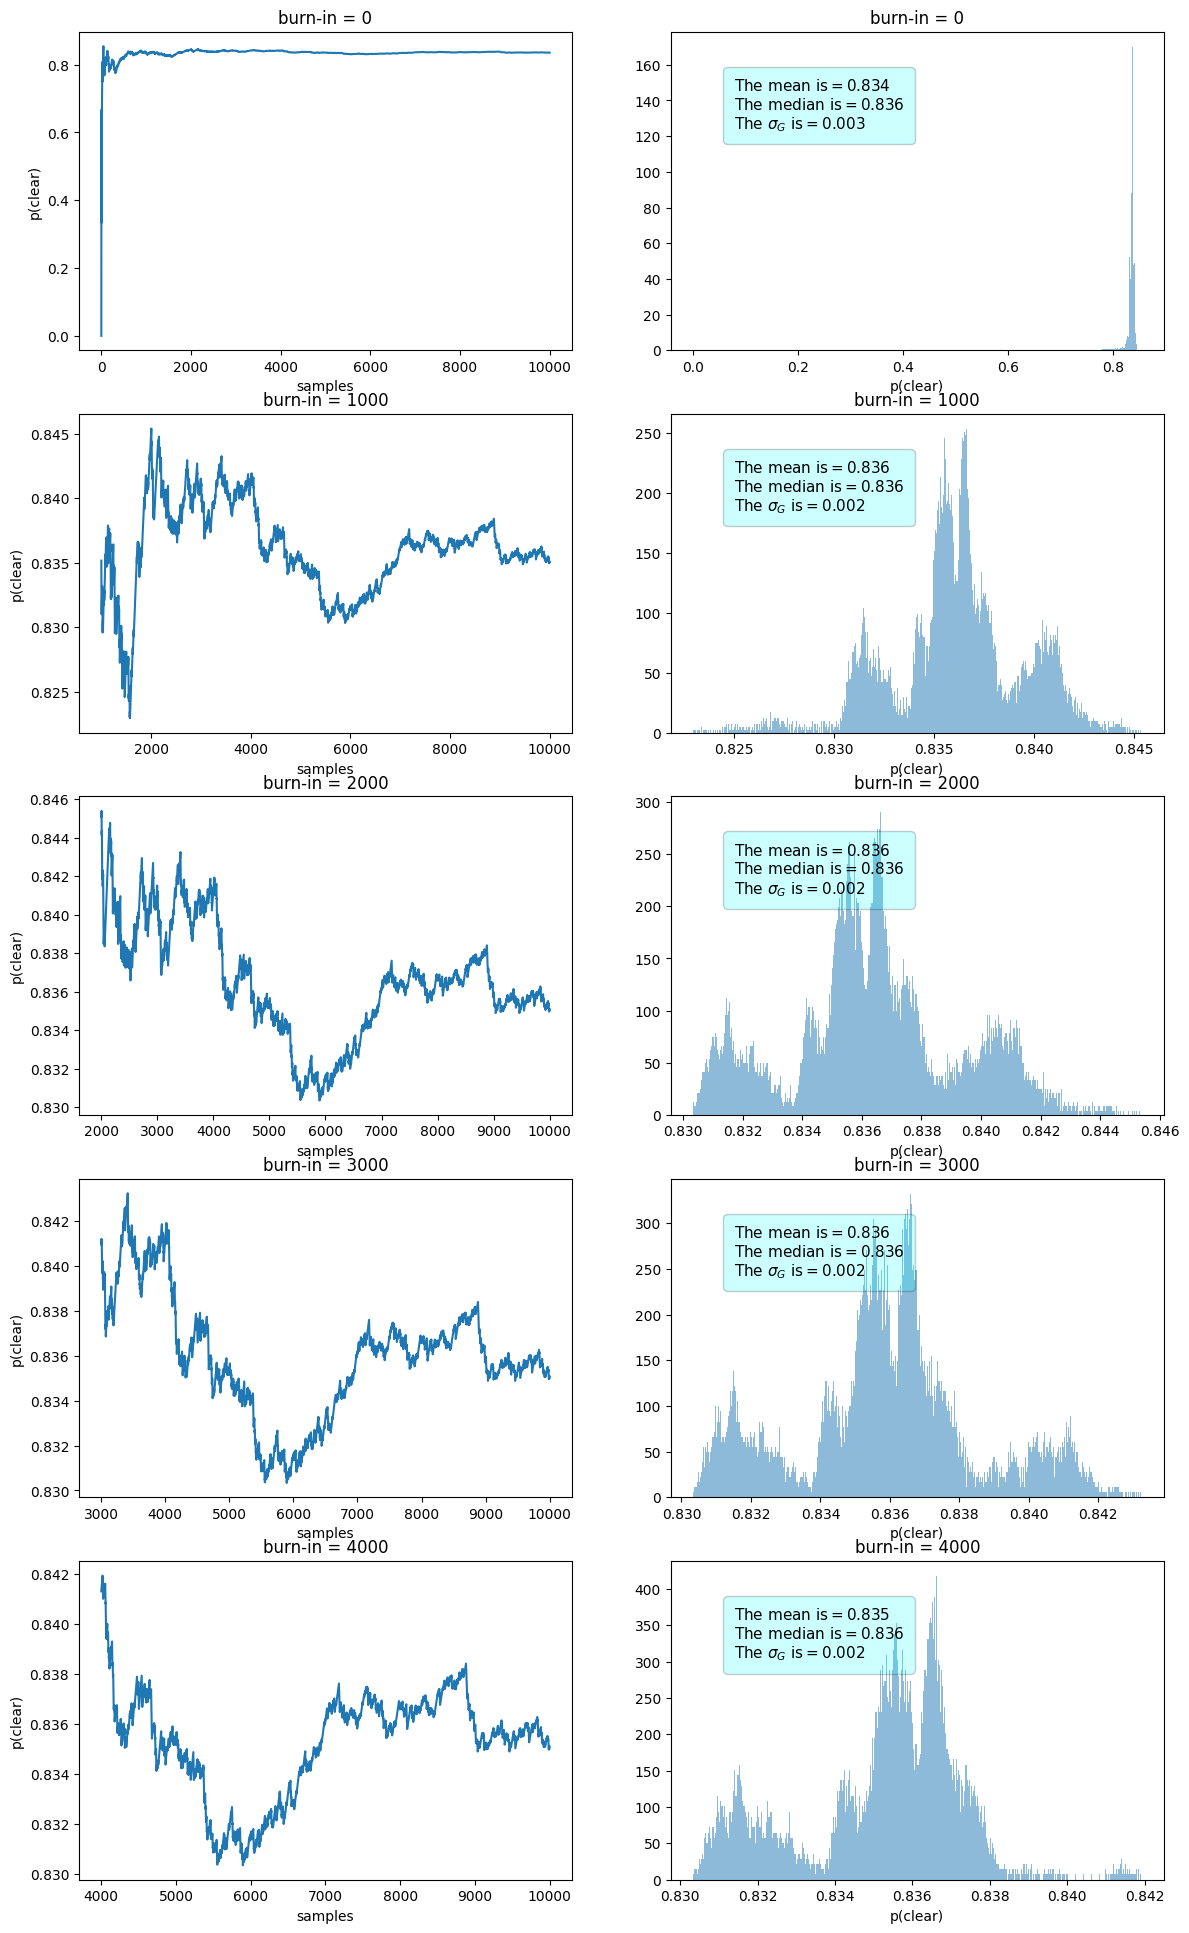

In [7]:
# 6) In the above example, experiment with chopping off different numbers of initial points as burn-in.
burn_in = np.arange(0,5*10**3, step=10**3, dtype='int')
fig,axs = plt.subplots(len(burn_in),2,figsize=(14,24))
for b_in,ax in zip(burn_in,axs):
    prob_s_cut = prob_s[b_in:]
    ax[0].plot(xaxis[b_in:], prob_s_cut)
    ax[0].set_xlabel('samples')
    ax[0].set_ylabel('p(clear)')
    ax[0].set_title('burn-in = '+str(b_in))

    ax[1].hist(prob_s_cut, bins=500, density=True, alpha=0.5)
    ax[1].set_xlabel('p(clear)')
    ax[1].set_title('burn-in = '+str(b_in))
    
    mean    = np.mean(prob_s_cut)
    median  = np.median(prob_s_cut)
    sigma_G = astroML.stats.sigmaG(prob_s_cut)

    textstr = '\n'.join((
    r'$\text{The mean is}=%.3f$' %(mean),
    r'$\text{The median is}=%.3f$' % (median, ),
    r'$\text{The } \sigma_G \text{ is}=%.3f$' % (sigma_G, )))
    anchored_text = AnchoredText(textstr, loc='upper left', prop=dict(size=11), frameon=True, 
                             bbox_to_anchor=(0.1, 0.9), bbox_transform=ax[1].transAxes)
    anchored_text.patch.set_boxstyle('round')
    anchored_text.patch.set_facecolor('cyan')
    anchored_text.patch.set_alpha(0.2)
    ax[1].add_artist(anchored_text)

More number of points in the burn-in, more tails of the distribution go away. <br>
We can see this by observing the $\sigma_G$, which is decreasing as I increase the burn-in number.